# Coursera Capstone Final Project

#### By Rebecca Rebuck

In [54]:
# necessary imports and installs

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from pandas.io.json import json_normalize

!pip install folium
import folium

### Data Aquisition

In [2]:
# lat and long for the Hyatt Regency Atl

address = '265 Peachtree St NE, Atlanta, GA'

geolocator = Nominatim(user_agent="hyatt_test")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print((latitude, longitude))

(33.7616305, -84.38663621127573)


In [3]:
# Foursquare credentials removed

In [45]:
CLIENT_ID = 'BU0XPMPJRPK34HDOH4OIPVB2MTESK1VJREBSOE3FMQ0M1KO0' # your Foursquare ID
CLIENT_SECRET = 'M5C0AFYCSNPBPGD0LR0FOCSFZPSR5AGFYB2UGMJYL2P33SJ0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 250
categoryId = '4d4b7104d754a06370d81259'

In [46]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    categoryId, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=BU0XPMPJRPK34HDOH4OIPVB2MTESK1VJREBSOE3FMQ0M1KO0&client_secret=M5C0AFYCSNPBPGD0LR0FOCSFZPSR5AGFYB2UGMJYL2P33SJ0&ll=33.7616305,-84.38663621127573&v=20180605&categoryId=4d4b7104d754a06370d81259&radius=250&limit=100'

In [47]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603fdb706a66e33d372dc634'},
 'response': {'venues': [{'id': '5cc3972fbcbf7a0039d3a5e5',
    'name': 'Time To Escape',
    'location': {'lat': 33.759987,
     'lng': -84.38653,
     'labeledLatLngs': [{'label': 'display',
       'lat': 33.759987,
       'lng': -84.38653}],
     'distance': 183,
     'postalCode': '30303',
     'cc': 'US',
     'city': 'Atlanta',
     'state': 'GA',
     'country': 'United States',
     'formattedAddress': ['Atlanta, GA 30303', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d182941735',
      'name': 'Theme Park',
      'pluralName': 'Theme Parks',
      'shortName': 'Theme Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/themepark_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1614797680',
    'hasPerk': False},
   {'id': '4dba1f80f7b144688ff2aea6',
    'name': 'Kristofer Laméy Art & Design',
    'location': {'address': 'Atlanta Marrio

In [48]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet
0,5cc3972fbcbf7a0039d3a5e5,Time To Escape,"[{'id': '4bf58dd8d48988d182941735', 'name': 'T...",v-1614797680,False,33.759987,-84.386530,"[{'label': 'display', 'lat': 33.759987, 'lng':...",183,30303,US,Atlanta,GA,United States,"[Atlanta, GA 30303, United States]",NaN,NaN
1,4dba1f80f7b144688ff2aea6,Kristofer Laméy Art & Design,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",v-1614797680,False,33.761969,-84.385580,"[{'label': 'display', 'lat': 33.761969, 'lng':...",104,30303,US,Atlanta,GA,United States,[Atlanta Marriott Marquis tower two 285 Peacht...,Atlanta Marriott Marquis tower two 285 Peachtr...,Peachtree Center Avenue and Baker street
2,521fdba911d2eb3d6e5b5695,Dragon Con Tolkien Track Room,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1614797680,False,33.760954,-84.385223,"[{'label': 'display', 'lat': 33.76095359320138...",150,NaN,US,Atlanta,GA,United States,"[Marriott Marquis (L401-L403), Atlanta, GA, Un...",Marriott Marquis,L401-L403
3,4effa977f9abd5b3906ae3a2,Downtown Countdown,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1614797680,False,33.761695,-84.387235,"[{'label': 'display', 'lat': 33.76169524007424...",55,30303-1294,US,Atlanta,GA,United States,"[Hyatt Regency Atlanta, 265 Peachtree St NE, A...","Hyatt Regency Atlanta, 265 Peachtree St NE, At...",NaN
4,522436d211d2750f4b8b3b69,Crunch Bunch Panel,"[{'id': '4bf58dd8d48988d1f1931735', 'name': 'G...",v-1614797680,False,33.761109,-84.387253,"[{'label': 'display', 'lat': 33.761109, 'lng':...",81,NaN,US,Atlanta,GA,United States,"[Atlanta, GA, United States]",NaN,NaN


In [49]:
dataframe.shape

(44, 17)

In [51]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Time To Escape,Theme Park,33.759987,-84.386530,"[{'label': 'display', 'lat': 33.759987, 'lng':...",183,30303,US,Atlanta,GA,United States,"[Atlanta, GA 30303, United States]",NaN,NaN,5cc3972fbcbf7a0039d3a5e5
1,Kristofer Laméy Art & Design,Art Gallery,33.761969,-84.385580,"[{'label': 'display', 'lat': 33.761969, 'lng':...",104,30303,US,Atlanta,GA,United States,[Atlanta Marriott Marquis tower two 285 Peacht...,Atlanta Marriott Marquis tower two 285 Peachtr...,Peachtree Center Avenue and Baker street,4dba1f80f7b144688ff2aea6
2,Dragon Con Tolkien Track Room,General Entertainment,33.760954,-84.385223,"[{'label': 'display', 'lat': 33.76095359320138...",150,NaN,US,Atlanta,GA,United States,"[Marriott Marquis (L401-L403), Atlanta, GA, Un...",Marriott Marquis,L401-L403,521fdba911d2eb3d6e5b5695
3,Downtown Countdown,General Entertainment,33.761695,-84.387235,"[{'label': 'display', 'lat': 33.76169524007424...",55,30303-1294,US,Atlanta,GA,United States,"[Hyatt Regency Atlanta, 265 Peachtree St NE, A...","Hyatt Regency Atlanta, 265 Peachtree St NE, At...",NaN,4effa977f9abd5b3906ae3a2
4,Crunch Bunch Panel,General Entertainment,33.761109,-84.387253,"[{'label': 'display', 'lat': 33.761109, 'lng':...",81,NaN,US,Atlanta,GA,United States,"[Atlanta, GA, United States]",NaN,NaN,522436d211d2750f4b8b3b69


In [52]:
dataframe_filtered.name

0                                        Time To Escape
1                          Kristofer Laméy Art & Design
2                         Dragon Con Tolkien Track Room
3                                    Downtown Countdown
4                                    Crunch Bunch Panel
5                             Dragon Con Puppetry Track
6                                      FWA Dealer's Den
7     Young Adult Literature Track @ Dragon Con - Ma...
8                            Hyatt - Armory Programming
9                          DragonCon Geek Glamour Revue
10                              The John Barrowman Show
11                              Brit Track @ Dragon*Con
12                                  Westin Augusta I-II
13                                          NRG Atlanta
14                                          Stubhub LMS
15                         Final Four Atlanta Radio Row
16                                        Parsec Awards
17                             Welcome To The Do

In [60]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=17) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Hyatt
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [67]:
df_f = dataframe_filtered.groupby('categories').count().reset_index()
df_f

,categories,name,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Art Gallery,3,3,3,3,3,2,3,3,3,3,3,1,1,3
1,Arts & Entertainment,2,2,2,2,2,0,2,2,2,2,2,0,0,2
2,Concert Hall,3,3,3,3,3,2,3,3,3,3,3,3,0,3
3,General Entertainment,24,24,24,24,24,13,24,23,24,24,24,8,3,24
4,Historic Site,3,3,3,3,3,1,3,2,3,3,3,0,0,3
5,Indie Theater,1,1,1,1,1,0,1,0,1,1,1,0,0,1
6,Music Venue,1,1,1,1,1,0,1,1,1,1,1,0,0,1
7,Performing Arts Venue,1,1,1,1,1,1,1,1,1,1,1,1,0,1
8,Piano Bar,1,1,1,1,1,1,1,1,1,1,1,1,0,1
9,Public Art,1,1,1,1,1,1,1,1,1,1,1,0,0,1


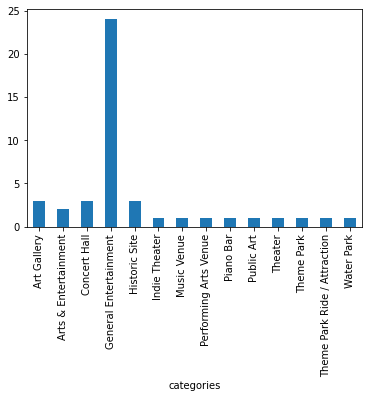

In [69]:
ax = df_f.plot.bar(x='categories', y='name', legend=False)